# Lab Three, Multi-modal and Multi-task

Xingming Qu, Bowei Tian

## 1 Download the ChEMBL database or setup queries to download a subset go the database.


Thanks to Niraj for making this available to everyone!!!

In [7]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import pickle
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
# Read csv
f = open('../data.csv', 'r', encoding="ISO-8859-1")
lines = f.readlines()
f.close()

In [3]:
total_record=len(lines)
print(total_record)

1065321


In [4]:
# print the first row to get feature name
bug=[] # will be used to save bad record
flis = [] # will have [id, ic50_val, unit, target, smiles] 
for line in lines[:1]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    print(line)
    print(len(lis))

" M o l e c u l e " , " S t a n d a r d   T y p e " , " S t a n d a r d   R e l a t i o n " , " S t a n d a r d   V a l u e " , " S t a n d a r d   U n i t s " , " p C h E M B L   V a l u e " , " C o m m e n t " , " C o m p o u n d   K e y " , " A s s a y " , " A s s a y   D e s c r i p t i o n " , " B A O   F o r m a t " , " T a r g e t " , " T a r g e t   P r e f .   N a m e " , " T a r g e t   O r g a n i s m " , " T a r g e t   T y p e " , " D o c u m e n t " , " S o u r c e " , " M a x   P h a s e " , " # R o 5   V i o l a t i o n s " , " M o l e c u l a r   W e i g h t " , " L i g a n d   E f f i c i e n c y   B E I " , " L i g a n d   E f f i c i e n c y   L E " , " L i g a n d   E f f i c i e n c y   L L E " , " L i g a n d   E f f i c i e n c y   S E I " , " A L o g P " , " A s s a y   O r g a n i s m " , " A s s a y   T i s s u e   C h E M B L   I D " , " A s s a y   T i s s u e   N a m e " , " A s s a y   C e l l   T y p e " , " A s s a y   S u b c e l l u l a r   F r a c t 

We can see a record should have 43 columns

In [5]:
for line in lines[:10]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    if len(lis)!=43:
        print(line)
        print(len(lis))

 " C H E M B L 3 5 7 3 3 8 " , " I C 5 0 " , " > " , " 5 0 0 0 0 " , " n M " , " " , " " , " 1 6   2 - g " , " C H E M B L 8 1 2 4 4 6 " , " I n h i b i t o r y   a c t i v i t y   a g a i n s t   T r y p a n o s o m a   c r u z i   t r y p a n o t h i o n e   d i s u l f i d e   r e d u c t a s e ,   a s s a y   i n   p r e s e n c e   o f   5 7   u M   T ( S ) 2 . " , " s i n g l e   p r o t e i n   f o r m a t " , " C H E M B L 5 1 3 1 " , " T r y p a n o t h i o n e   r e d u c t a s e " , " T r y p a n o s o m a   c r u z i " , " S I N G L E   P R O T E I N " , " C H E M B L 1 1 3 4 7 9 1 " , " S c i e n t i f i c   L i t e r a t u r e " , " 0 " , " 0 " , " 3 2 6 . 4 " , " " , " " , " " , " " , " 1 . 9 4 " , " T r y p a n o s o m a   c r u z i " , " " , " " , " " , " " , " 5 6 9 3 " , " B A O _ 0 0 0 0 3 5 7 " , " " , " " , " " , " " , " C N 1 C C N ( C C 1 ) C ( = O ) C C C 2 = C ( C ) C ( = O ) c 3 c c c c c 3 C 2 = O " , " " , " J .   M e d .   C h e m . " , " 2 0 0 1 " , " 1 "

Here we can see: <br>
 Inhibitory activity against Trypanosoma cruzi trypanothione disulfide <b> reductase, assay</b>  in presence of 57 uM T(S)2.<br>
 There is a , in the sentence. So we can not use split(',')
 



In [6]:
bug=[]
for line in lines[1:]: # first line contains the headers (therefore skiped)
    lis = line.strip().split(',')
    if len(lis)!=43:
        bug.append(len(lis))
len(bug)

295467

useing split(',') will damage 295467 records

In [7]:
c=set(bug)
print(c)

{1, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 86, 99}


So we can see we have lots of records length >43, it is becuase we have , inside sentence

Consider <br>
"CHEMBL357338","IC50",">","50000","nM","","","16 2-g","CHEMBL812446","Inhibitory activity against Trypanosoma cruzi trypanothione disulfide reductase, assay in presence of 57 uM T(S)2.","single protein format","CHEMBL5131",

We could replace "," to a rare punctuation like "!" and use ! to split

In [8]:
test=lines[0]
te=''
for ch in test:
    te=te+ch

te=te.replace('\x00','')
te=te.strip()
te=te.replace('","','"!"')
te=te.replace('"','')
te=te.split('!')

print(te,'\n')
print(len(te))
print(te[0])
print(te[3])
print(te[4])
print(te[8])
print(te[36])
# [id, ic50_val, unit, target, smiles]
# [0,3,4,8,36]

['Molecule', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Comment', 'Compound Key', 'Assay', 'Assay Description', 'BAO Format', 'Target', 'Target Pref. Name', 'Target Organism', 'Target Type', 'Document', 'Source', 'Max Phase', '#Ro5 Violations', 'Molecular Weight', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'ALogP', 'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction', 'Organism Tax ID', 'BAO Format ID', 'Published Type', 'Published Relation', 'Published Value', 'Published Units', 'Canonical Smiles', 'Data Validity Comment', 'Document Journal', 'Document Year', 'SRC ID', 'UO Units', 'Potential Duplicate'] 

43
Molecule
Standard Value
Standard Units
Assay
Canonical Smiles


In [9]:
test=lines[1]
te=''
for ch in test:
    te=te+ch

te=te.replace('\x00','')
te=te.strip()
te=te.replace('","','"!"')
te=te.replace('"','')
te=te.split('!')

# print(te,'\n')
print(len(te))
print(te[0])
print(te[3])
print(te[4])
print(te[8])
print(te[36])
# [id, ic50_val, unit, target, smiles]
# [0,3,4,8,36]

43
CHEMBL17430
11600
nM
CHEMBL664913
Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1


In [10]:
miss_ic50=0
smiles=[]
target=[]
unit=[]
ic50=[]
it=0
new_bugs=[]
for line in lines[1:]: # first line contains the headers (therefore skiped)
    
    if it%100000==0:
        print(it/total_record,end='  ')
    it=it+1
    
    te=''
    for ch in line:
        te=te+ch
    
    te=te.replace('\x00','')
    te=te.strip()
    te=te.replace('","','"!"')
    te=te.replace('"','')
    te=te.split('!')


    if len(te)!=43:
        new_bugs.append(len(te))
    if len(te)==43:
        try:
            ic50.append(float(te[3]))
            smiles.append(te[36])
            target.append(te[8])
            unit.append(te[4])
        except:
            miss_ic50=miss_ic50+1

0.0  0.09386842087971607  0.18773684175943214  0.2816052626391482  0.3754736835188643  0.4693421043985803  0.5632105252782964  0.6570789461580124  0.7509473670377286  0.8448157879174446  0.9386842087971606  

In [11]:
print('bad records:',len(new_bugs))
print('clean data:',len(ic50))
print('data mised ic50:',miss_ic50)

bad records: 3853
clean data: 945997
data mised ic50: 115470


Using new split methods, we only damage 3853 records.

In [12]:
DATA_DICT={'target':target, 'smiles':smiles, 'unit':unit , 'ic50':ic50}
DATA=pd.DataFrame(data=DATA_DICT)
DATA.head()

,target,smiles,unit,ic50
0,CHEMBL664913,Nc1nc(N)c2c(CSc3ccc(Cl)c(Cl)c3)c[nH]c2n1,nM,11600.0
1,CHEMBL812106,NC(=S)\N=N\c1c(O)[nH]c2ccc(I)cc12,nM,9000.0
2,CHEMBL811877,[Cl-].C[N+](C)(CCCN1c2ccccc2Sc3ccc(Cl)cc13)Cc4...,nM,17900.0
3,CHEMBL664920,COc1cc(OC)cc(c1)N(C)Cc2c[nH]c3nc(N)nc(O)c23,nM,4200.0
4,CHEMBL664913,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,nM,2700.0


In [ ]:
len(DATA)
DATA.to_pickle("./clean_data.pkl")

In [16]:
DATA = pd.read_pickle("./clean_data.pkl")

## 2  Filter the database to the top 100 targets in the database. You will need a definition of "top" such as the targets with the most assays. From these top 100 targets, save the ligands that have an assay result for each of the targets. 



In [17]:
# print the unit and see how many types it has
unitcounts=DATA['unit'].value_counts()
unitcounts

nM                 940733
ug.mL-1              4953
                      146
%                      34
/uM                    25
milliequivalent        20
ppm                    18
p.p.m.                 10
uM tube-1               9
min                     9
molar ratio             8
ucm                     6
mg kg-1                 6
nmol/mg                 5
mg.min/m3               4
ug                      3
umol/dm3                2
ucm/s                   2
10'13nM                 1
10'7nM                  1
10'-4umol/L             1
10'8nM                  1
Name: unit, dtype: int64

In [18]:
# we only need data type == nm
Filtered_data= DATA[DATA['unit']=='nM']

In [19]:
len(Filtered_data)

940733

In [20]:
# count each target has how many element
counts=Filtered_data['target'].value_counts()
counts

CHEMBL2114881    2057
CHEMBL2114714    1381
CHEMBL1738239    1210
CHEMBL1614190    1205
CHEMBL1963941    1186
CHEMBL1963883    1186
CHEMBL1614432    1128
CHEMBL1614529    1106
CHEMBL3888191    1062
CHEMBL2328568    1017
CHEMBL1794550    1013
CHEMBL1738498    1013
CHEMBL2114932    1011
CHEMBL2114818    1011
CHEMBL1794574    1011
CHEMBL3562022     991
CHEMBL1738639     940
CHEMBL1738682     940
CHEMBL1794362     896
CHEMBL1613799     827
CHEMBL3888383     800
CHEMBL3881499     800
CHEMBL3436041     792
CHEMBL3436039     792
CHEMBL3436040     792
CHEMBL3705899     773
CHEMBL3888194     758
CHEMBL3705123     752
CHEMBL1614063     744
CHEMBL3887063     741
                 ... 
CHEMBL3390512       1
CHEMBL3743750       1
CHEMBL2410563       1
CHEMBL2344388       1
CHEMBL1244081       1
CHEMBL682320        1
CHEMBL1935940       1
CHEMBL3747978       1
CHEMBL3242000       1
CHEMBL1919730       1
CHEMBL3624356       1
CHEMBL617398        1
CHEMBL2045158       1
CHEMBL919915        1
CHEMBL8066

In [21]:
# we just pick top 1000 at first.
# because some targets' label are all 0 of all 1,which is no use
# we will throw these data later, so the task will be less than 1000
Pick_top=1000
sum(counts[:Pick_top])

233906

 Get top 1000 targets in the database. 
 
 Here we define "top" as the targets with the most assays. 

In [22]:
top_target= counts.index[:Pick_top]
top_target

Index(['CHEMBL2114881', 'CHEMBL2114714', 'CHEMBL1738239', 'CHEMBL1614190',
       'CHEMBL1963941', 'CHEMBL1963883', 'CHEMBL1614432', 'CHEMBL1614529',
       'CHEMBL3888191', 'CHEMBL2328568',
       ...
       'CHEMBL1694433', 'CHEMBL3887026', 'CHEMBL3367077', 'CHEMBL2114802',
       'CHEMBL1072072', 'CHEMBL989823', 'CHEMBL648847', 'CHEMBL3887077',
       'CHEMBL3367079', 'CHEMBL3880150'],
      dtype='object', length=1000)

In [19]:
Filtered_data= Filtered_data[Filtered_data['target'].isin(top_target)]
Filtered_data[:10]

,target,smiles,unit,ic50
78,CHEMBL828662,CN(Cc1c[nH]c2nc(N)nc(N)c12)c3cccc4ccccc34,nM,870.00
79,CHEMBL830839,COc1ccccc1Sc2ccc3nc(N)nc(N)c3n2,nM,57.94
80,CHEMBL828662,Nc1nc(N)c2CC(CNc3cc(Cl)ccc3Cl)CCc2n1,nM,97.00
81,CHEMBL830839,Nc1nc(N)c2CC(CNc3cc(Cl)ccc3Cl)CCc2n1,nM,97.01
83,CHEMBL828662,COc1ccc(N(C)Cc2ccc3nc(N)nc(N)c3n2)c(OC)c1,nM,14.00
86,CHEMBL830839,COc1ccc(CNc2cnc3nc(N)nc(N)c3c2)c(OC)c1OC,nM,350.03
87,CHEMBL828662,COc1cc(Nc2ccc3nc(N)nc(N)c3n2)cc(OC)c1OC,nM,2400.00
89,CHEMBL830839,CN(Cc1ccccc1)c2cnc3nc(N)nc(N)c3c2,nM,32.00
124,CHEMBL1071424,Cc1c(Sc2ccc(Cl)cc2)[nH]c3nc(N)nc(N)c13,nM,8930.00
125,CHEMBL1071424,COc1ccc(c2nc3c(N)nc(N)nc3[nH]2)c(c1OC)[N+](=O)...,nM,16800.00


In [20]:
len(Filtered_data)

233906

After filtered the data. We have top 1000 targets and 233906 assay in total

## 3  Binarize the binding affinity for each ligand in the assay. That is, convert the continuous measure of binding to binary. You should use the column 'IC50' for this calculation. Anything below 300 nM should be considered as an active binding. Anything above 10 uM should be considered non-binding (inactive). 

below 300 nM should be considered as an active binding -->1<br>
Anything above 10 uM should be considered non-binding (inactive)--->0

10 uM=10000 nm

Let's count how many records are belong to 0 and 1

In [21]:
# first we throw all the data between 300 and 10000
df=Filtered_data.copy()
before_drop=len(df)
print('Before',before_drop)

df.drop(df[(df.ic50 > 300) & (df.ic50 < 10000) ].index, inplace=True)
print('After',len(df))
print('droped',before_drop-len(df))

Before 233906
After 166876
droped 67030


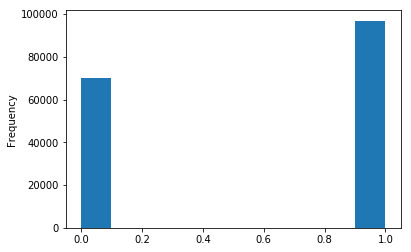

In [22]:
test=df.copy()
test['ic50'][(test.ic50 <= 300)]=1
test['ic50'][(test.ic50 >= 10000)]=0
test['ic50'].plot.hist()

In [23]:
test.ic50.value_counts()

1.0    96856
0.0    70020
Name: ic50, dtype: int64

In [24]:
Binarized_data=test.copy()
Binarized_data[:10]

,target,smiles,unit,ic50
79,CHEMBL830839,COc1ccccc1Sc2ccc3nc(N)nc(N)c3n2,nM,1.0
80,CHEMBL828662,Nc1nc(N)c2CC(CNc3cc(Cl)ccc3Cl)CCc2n1,nM,1.0
81,CHEMBL830839,Nc1nc(N)c2CC(CNc3cc(Cl)ccc3Cl)CCc2n1,nM,1.0
83,CHEMBL828662,COc1ccc(N(C)Cc2ccc3nc(N)nc(N)c3n2)c(OC)c1,nM,1.0
89,CHEMBL830839,CN(Cc1ccccc1)c2cnc3nc(N)nc(N)c3c2,nM,1.0
125,CHEMBL1071424,COc1ccc(c2nc3c(N)nc(N)nc3[nH]2)c(c1OC)[N+](=O)...,nM,0.0
126,CHEMBL1071424,CN(Cc1coc2nc(N)nc(N)c12)c3cc(Cl)c(Cl)c(Cl)c3,nM,0.0
127,CHEMBL1071424,Nc1nc(N)c2c(CNc3ccc4ccccc4c3)coc2n1,nM,0.0
128,CHEMBL1071424,Nc1nc(N)c2c(CNc3ccccc3c4ccccc4)coc2n1,nM,0.0
183,CHEMBL1071424,CN(Cc1coc2nc(N)nc(N)c12)c3ccc4ccccc4c3,nM,0.0


In [ ]:
Binarized_data.to_pickle("Binarized_data.pkl")

In [15]:
Binarized_data= pd.read_pickle("Binarized_data.pkl")

## 4  Featurize each ligand using RDKit (https://www.rdkit.org (Links to an external site.)Links to an external site.). This will convert the ligand representation into a binary vector of features. Mention any hyper parameters you use.


In [2]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys, AllChem
from rdkit.Avalon import pyAvalonTools as fpAvalon
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.ChemicalFeatures import BuildFeatureFactory
from rdkit.Chem import rdMolDescriptors
import pandas as pd
import argparse
import textwrap
import getopt
from argparse import ArgumentParser
import time

In [3]:
def CalculateFP_mod(smiles, N_BITS=256):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError('SMILES cannot be converted to a RDKit molecules:', smiles)

    return AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=N_BITS)

In [4]:
# convert smile to np arr bitvector
def smile2BitVect_nparr(smiles):
    bitstr=CalculateFP_mod(smiles,256).ToBitString()
    bitvector=np.array([int(i) for i in bitstr])
    return bitvector

In [5]:
# Next we use AtomPairFingerprint
# prepare for Exceptional work
def Calculate_AtomPairFingerprint(smiles, N_BITS=512):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError('SMILES cannot be converted to a RDKit molecules:', smiles)
    return AllChem.GetHashedAtomPairFingerprintAsBitVect(m, nBits=N_BITS)

In [6]:
# convert smile to np arr bitvector
def smile2BitVect_AtomPair(smiles):
    bitstr=Calculate_AtomPairFingerprint(smiles,512).ToBitString()
    bitvector=np.array([int(i) for i in bitstr])
    return bitvector
        

#### The hyper parameters used here are radius and the length of bit vector. I looked the RDKit document and almost all their examples were using radius=2 as default. So we will not change the radius.

For length of bit vector we first calculate the number of 1. As you can see the test below, it is sparse. So we do not need to set the length too long.

In [7]:
c=smile2BitVect_nparr('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F')
len(c)

256

In [8]:
e=smile2BitVect_AtomPair('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F')
len(e)

512

In [9]:
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',128).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',256).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',512).ToBitString().count('1') )
print(CalculateFP_mod('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',1024).ToBitString().count('1') )

40
48
50
51


256 should be a suitable number. Because when reduced from 1024-512 and 512-256 the number of 1 only reduced 1 and 2 

In [10]:
print(Calculate_AtomPairFingerprint('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',128).ToBitString().count('1') )
print(Calculate_AtomPairFingerprint('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',256).ToBitString().count('1') )
print(Calculate_AtomPairFingerprint('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',512).ToBitString().count('1') )
print(Calculate_AtomPairFingerprint('CCN1[C@@H](CCCC1=O)C(=O)NCc2cccc(c2Cl)C(F)(F)F',1024).ToBitString().count('1') )

112
153
199
220


512 might be a good number, since it just reduces 21 "1", when the dimension goes down from 1024 to 512

In [23]:
# init our new data set after pre-processing 
# it will be a dict and key is the name of target and value is a list
tasks ={}
for each_target in top_target:
    tasks[each_target]=[[],[],[],[]]
    # 0 save MorganFingerprint bit vector 
    # 1 save label
    # 2 save the ratio of 1/0 in label
    # 3 save AtomPairFingerprint bit vector 

In [24]:
# some items has missed smile or their smile is a float number or their smile is something other than a smile
# so we just need to remove them
missed_smile=0
for i in range(len(Binarized_data)):
    item=Binarized_data.iloc[i]
    
    target=item.target
    each_label= int(item.ic50)
    smile=item.smiles

    try: # try if convert failed 
        bitvector=smile2BitVect_nparr(smile)
        atombit=smile2BitVect_AtomPair(smile)
        tasks[target][0].append(bitvector)
        tasks[target][1].append(each_label)
        tasks[target][3].append(atombit)
    except:
        missed_smile=missed_smile+1
print('missed smile',missed_smile)
    

missed smile 40


In [25]:
%%time
# convert trainning data into np array
for key,value in tasks.items():
    value[0]=np.array(value[0])
    value[1]=np.array(value[1])
    value[3]=np.array(value[3])

Wall time: 499 ms


In [26]:
# now let's check if the labels of a target are all 0 or all 1 or highly imbalance
def check_if_all_zero_or_all_ones(label):
    length=len(label)
    if length==0:
        return 0
    ones=sum(label)
    ratio=ones/length
    return ratio

In [27]:
for key,value in tasks.items():
    ratio=check_if_all_zero_or_all_ones(value[1])
    value[2]=ratio

In [28]:
# you can see how many records a target has all 0 or all 1
times=0
for key,value in tasks.items():
    print(key,value[0].shape,value[1].shape,value[2],value[3].shape)
    times=times+1
    if times ==30:
        break

CHEMBL2114881 (2031, 256) (2031,) 0.0 (2031, 512)
CHEMBL2114714 (1346, 256) (1346,) 0.0 (1346, 512)
CHEMBL1738239 (1051, 256) (1051,) 0.0 (1051, 512)
CHEMBL1614190 (892, 256) (892,) 0.0011210762331838565 (892, 512)
CHEMBL1963941 (1186, 256) (1186,) 0.0 (1186, 512)
CHEMBL1963883 (1186, 256) (1186,) 0.0 (1186, 512)
CHEMBL1614432 (621, 256) (621,) 0.0 (621, 512)
CHEMBL1614529 (164, 256) (164,) 0.0 (164, 512)
CHEMBL3888191 (947, 256) (947,) 0.996832101372756 (947, 512)
CHEMBL2328568 (585, 256) (585,) 0.8341880341880342 (585, 512)
CHEMBL1794550 (958, 256) (958,) 0.0 (958, 512)
CHEMBL1738498 (651, 256) (651,) 0.0015360983102918587 (651, 512)
CHEMBL2114932 (304, 256) (304,) 0.03289473684210526 (304, 512)
CHEMBL2114818 (369, 256) (369,) 0.02168021680216802 (369, 512)
CHEMBL1794574 (244, 256) (244,) 0.0 (244, 512)
CHEMBL3562022 (709, 256) (709,) 0.0014104372355430183 (709, 512)
CHEMBL1738639 (331, 256) (331,) 0.13595166163141995 (331, 512)
CHEMBL1738682 (497, 256) (497,) 0.08048289738430583 (49

In [29]:
# let's throw highly imbalanced data
filtered_tasks={}
T=0.2
for key,value in tasks.items():
    if value[2]>T and value[2]<1-T:
        filtered_tasks[key]= tasks[key]

In [30]:
# after another filter
times=0
for key,value in filtered_tasks.items():
    print(key,value[0].shape,value[1].shape,value[2],value[3].shape)
    times=times+1
    if times ==30:
        break

CHEMBL3705476 (231, 256) (231,) 0.7748917748917749 (231, 512)
CHEMBL3887333 (319, 256) (319,) 0.6394984326018809 (319, 512)
CHEMBL3705983 (215, 256) (215,) 0.4372093023255814 (215, 512)
CHEMBL3705790 (274, 256) (274,) 0.7335766423357665 (274, 512)
CHEMBL3706316 (331, 256) (331,) 0.7885196374622356 (331, 512)
CHEMBL1119333 (315, 256) (315,) 0.7936507936507936 (315, 512)
CHEMBL3705699 (141, 256) (141,) 0.7730496453900709 (141, 512)
CHEMBL3705791 (214, 256) (214,) 0.7897196261682243 (214, 512)
CHEMBL3705631 (216, 256) (216,) 0.49537037037037035 (216, 512)
CHEMBL3705264 (120, 256) (120,) 0.5416666666666666 (120, 512)
CHEMBL3734165 (214, 256) (214,) 0.6121495327102804 (214, 512)
CHEMBL1614377 (249, 256) (249,) 0.3855421686746988 (249, 512)
CHEMBL3888435 (93, 256) (93,) 0.20430107526881722 (93, 512)
CHEMBL3887866 (150, 256) (150,) 0.7866666666666666 (150, 512)
CHEMBL3705844 (149, 256) (149,) 0.785234899328859 (149, 512)
CHEMBL3889241 (174, 256) (174,) 0.6896551724137931 (174, 512)
CHEMBL3705

In [31]:
total=0
for key,value in filtered_tasks.items():
    total=total+value[0].shape[0]
#     print(key,value[0].shape,value[1].shape)
print('After remove invaild smiles,and very imbalanced data we have: ',total)

After remove invaild smiles,and very imbalanced data we have:  9077


In [32]:
all_ones=0
for key,value in filtered_tasks.items():
    ones=sum(value[1])
    all_ones=all_ones+ones

print('1:', all_ones )
print('0:', total-all_ones)

1: 5217
0: 3860


In [33]:
pickle_out = open("filtered_tasks.pickle","wb")
pickle.dump(filtered_tasks, pickle_out)

In [30]:
pickle_in = open("filtered_tasks.pickle","rb")
filtered_tasks = pickle.load(pickle_in)
print('All task Number:',len(filtered_tasks))

All task Number: 102


This is too coincidental... just after filtering, there are around 100 target left.And there are 900 tasks has imbalanced data!


## 5 Train a multi-task model (one model for each target). Use an 80/20 split for each target.


In [31]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from keras.layers import average, concatenate,RepeatVector,Lambda,add,subtract,Activation
from keras.regularizers import l2 

In [32]:
inputs = Input(shape=(256,))
shared_mlp = Dense(32, activation='relu')(inputs)
shared_mlp = Dropout(0.2)(shared_mlp)
shared_mlp = Dense(32, activation='relu')(shared_mlp)
shared_mlp = Dropout(0.2)(shared_mlp)
# make a dictionary of models for each task
models_mtl = dict()

for x in filtered_tasks.keys():
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1,activation='sigmoid')(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    models_mtl[x] = model

In [ ]:
X_train_MG = dict()
X_test_MG = dict()
X_train_AP = dict() # X_train_AP is atom pari fingerprint, which will be used in the exception work
X_test_AP = dict()
y_train = dict()
y_test = dict()

for x in filtered_tasks.keys():
    X_train_MG[x], X_test_MG[x], X_train_AP[x], X_test_AP[x], y_train[x], y_test[x] = train_test_split(filtered_tasks[x][0], 
                                                        filtered_tasks[x][3],
                                                        filtered_tasks[x][1], 
                                                        test_size=0.2, 
                                                        random_state=42)

In [ ]:
%%time
EPOCHS = 10
from random import shuffle
all_keys = [key  for key,_ in filtered_tasks.items()]
print(len(all_keys))
for i in range(EPOCHS):
    print('Epoch',i,end='')
    shuffle(all_keys)
    for x in all_keys:
        print('training on',x, end='')
        history=models_mtl[x].fit(X_train_MG[x],y_train[x],batch_size=16,verbose=0)

In [ ]:
%%time
y_mtl=[]
yhat_mtl=[]

for x in X_test_MG.keys():
    yhat_mlp = models_mtl[x].predict(X_test_MG[x])

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

In [ ]:
np.save('y_mtl.npy', y_mtl)
np.save('yhat_mtl.npy', yhat_mtl)

In [36]:
y_mtl=np.load('y_mtl.npy')
yhat_mtl=np.load('yhat_mtl.npy')

In [37]:
final_y_gt=np.concatenate(y_mtl)
final_y_hat=np.concatenate(yhat_mtl)
round_final_y_hat=np.round(final_y_hat)

In [38]:
# Let's just try concatenate all to get some intuition 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print('Acc:',accuracy_score(round_final_y_hat,final_y_gt))
print('F1:',f1_score(round_final_y_hat,final_y_gt))

Acc: 0.7214439655172413
F1: 0.7713401149933656


## 6 Report the results using AUC, BEDROC, and Enrichment factor. These metrics are easily calculated using the RDKit scoring library. Discuss the results (you will need to look up each evaluation metric to interpret the result). You may be interested in page 6 of the following document: https://www.dropbox.com/s/6je37ml475vg3ep/Srinivas2018ImplictDescriptorUnderReview.pdf?dl=0 (Links to an external site.)Links to an external site. 

In [4]:
from rdkit.ML.Scoring.Scoring import*

To evaluate our model, we will use "per target mode", which is discuss in "Implicit-descriptor ligand-based virtual screening by means of
collaborative filtering"   

In [5]:
def sort_each_target(y_hat,y_gt):
    d = {'y_hat': y_hat, 'y': y_gt}
    score = pd.DataFrame(data=d)
    score =score.sort_values(by='y_hat', ascending=False)
    # print(len(score))
    Rdkit_score=[]
    for i in range(len(score)):
        Rdkit_score.append([score.iloc[i]['y_hat'],score.iloc[i]['y']])
    return Rdkit_score

0    0.708586
dtype: float64


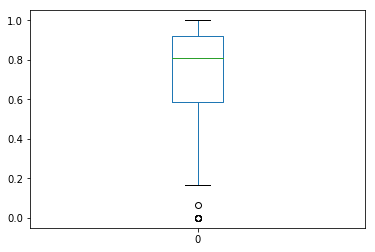

In [50]:
all_auc=[]
for y_hat,y_gt in zip(yhat_mtl,y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_auc.append(CalcAUC(Rdkit_score,1))
auc=pd.DataFrame(all_auc)
auc.plot.box()
print(np.mean(auc))

Here we got the mean AUC =0.71, which seems our classifier was not bad.<br>
However, base on the viewpoint from "Implicit-descriptor ligand-based virtual screening by means of
collaborative filtering", using AUC might cause the so-called "early recognition problem", which means it will mistakenly think that we get a good classification model if the model has an overall high true positive rate. Therefore, the AUG we got can not prove our model is good.<br>
So, let's try $EF_{1\%}$ next.

0    1.385055
dtype: float64


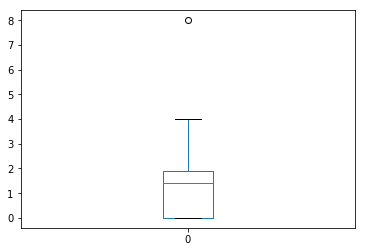

In [51]:
all_enrich=[]
for y_hat,y_gt in zip(yhat_mtl,y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_enrich.append(CalcEnrichment(Rdkit_score,1,[0.01]))
EF=pd.DataFrame(all_enrich)
EF.plot.box()
print(np.mean(EF))

Next, we tried $EF_{1\%}$, the result was not good as the results in the paper (5.476%).  However, the paper said when compare
the EF values obtained for different datasets, it is not appropriate since their number of actives might differ. In addition, this criterion assigns equal weights to the actives within the threshold,which adds bias to the evaluation. Therefore, we still can not use EF values to evaluate out model easily.<br>
Finally, let's try BEDROC.

0    0.729231
dtype: float64


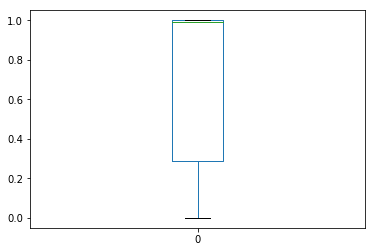

In [52]:
all_BEDROC=[]
for y_hat,y_gt in zip(yhat_mtl,y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_BEDROC.append(CalcBEDROC(Rdkit_score,1,20))
BEDROC=pd.DataFrame(all_BEDROC)
BEDROC.plot.box()
print(np.mean(BEDROC))

Here we use $BEDROC_{20}$ as mentioned in the paper. And we got the mean 0.73, which was event better than the results in the paper(0.72). According to the paper, this criterion seems good since it did not have noticeable default....Although our result was better than the paper, it did not prove that our model is better since we only used a small part of the dataset. However, it did show our model did good on this project.

## 7  Finally, you have free reign to perform any other analysis. A suggested analysis is to add an additional mode of input data such as another fingerprint for each ligand. 

In this part, let's just add another mlp model and use late fusion  with the previous model as the shared model. And then add one dense layer as task spcific layer.

In [33]:
inputs = Input(shape=(256,))
shared_mlp = Dense(32, activation='relu')(inputs)
shared_mlp = Dropout(0.2)(shared_mlp)
shared_mlp = Dense(32, activation='relu')(shared_mlp)
shared_mlp = Dropout(0.2)(shared_mlp)
# make a dictionary of models for each task

inputs_AP = Input(shape=(512,))
shared_mlp_AP = Dense(32, activation='relu')(inputs_AP)
shared_mlp_AP = Dropout(0.2)(shared_mlp_AP)
shared_mlp_AP = Dense(32, activation='relu')(shared_mlp_AP)
shared_mlp_AP = Dropout(0.2)(shared_mlp_AP)
# make a dictionary of models for each task

out=concatenate([shared_mlp,shared_mlp_AP])

new_models_mtl = dict()

for x in filtered_tasks.keys():
    personal_layer = Dense(10, activation='relu')(out)
    output_layer = Dense(1,activation='sigmoid')(personal_layer)
    model = Model(inputs=[inputs,inputs_AP], outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    new_models_mtl[x] = model

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
dense_215 (Dense)               (None, 32)           8224        input_6[0][0]                    
__________________________________________________________________________________________________
dense_217 (Dense)               (None, 32)           16416       input_7[0][0]                    
__________________________________________________________________________________________________
dropout_11

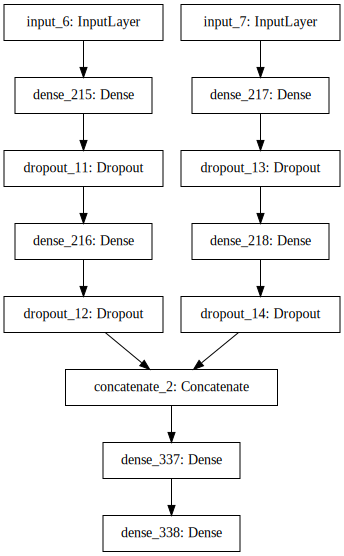

In [34]:
te=new_models_mtl['CHEMBL670366']
te.summary()
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(te).create(prog='dot', format='svg'))

In [ ]:
%%time
EPOCHS = 10
from random import shuffle
all_keys = [key  for key,_ in filtered_tasks.items()]
print(len(all_keys))
for i in range(EPOCHS):
    print('Epoch',i,end='')
    shuffle(all_keys)
    for x in all_keys:
        print('training on',x, end='')
        history=new_models_mtl[x].fit([X_train_MG[x],X_train_AP[x]],y_train[x],batch_size=16,verbose=0)

In [ ]:
%%time
new_y_mtl=[]
new_yhat_mtl=[]

for x in X_test_MG.keys():
    yhat_mlp = new_models_mtl[x].predict([X_test_MG[x],X_test_AP[x]])

    new_y_mtl.append(y_test[x].ravel())
    new_yhat_mtl.append(yhat_mlp.ravel())

In [ ]:
np.save('new_y_mtl.npy', new_y_mtl)
np.save('new_yhat_mtl.npy', new_yhat_mtl)

In [44]:
new_y_mtl=np.load('new_y_mtl.npy')
new_yhat_mtl=np.load('new_yhat_mtl.npy')

In [45]:
new_final_y_gt=np.concatenate(new_y_mtl)
new_final_y_hat=np.concatenate(new_yhat_mtl)
round_new_final_y_hat=np.round(new_final_y_hat)

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print('Acc:',accuracy_score(round_new_final_y_hat,new_final_y_gt))
print('F1:',f1_score(round_new_final_y_hat,new_final_y_gt))

Acc: 0.728448275862069
F1: 0.7756010685663401


0    0.728552
dtype: float64


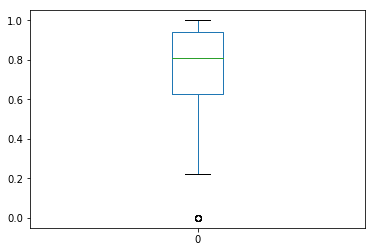

In [53]:
all_auc=[]
for y_hat,y_gt in zip(new_yhat_mtl,new_y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_auc.append(CalcAUC(Rdkit_score,1))
auc=pd.DataFrame(all_auc)
auc.plot.box()
print(np.mean(auc))

0    1.467711
dtype: float64


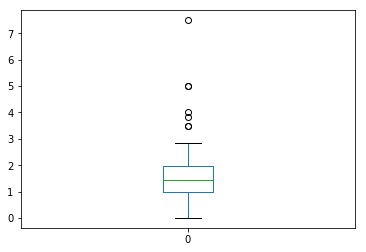

In [54]:
all_enrich=[]
for y_hat,y_gt in zip(new_yhat_mtl,new_y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_enrich.append(CalcEnrichment(Rdkit_score,1,[0.01]))
EF=pd.DataFrame(all_enrich)
EF.plot.box()
print(np.mean(EF))

0    0.751579
dtype: float64


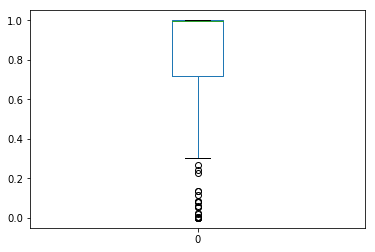

In [55]:
all_BEDROC=[]
for y_hat,y_gt in zip(new_yhat_mtl,new_y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_BEDROC.append(CalcBEDROC(Rdkit_score,1,20))
BEDROC=pd.DataFrame(all_BEDROC)
BEDROC.plot.box()
print(np.mean(BEDROC))

Well...with the new feature, we just improved a little bit.

## you might skip the rest because it was just a failed attempt... which prove oscar razor theory

Let's try some more sophisticated model. In this part, I would like to use multi-model first: wide and deep network from last semester fuse with 1-d convolution. Then perform multi-task. The intuition behind this is that  wide and deep network did good on both  memorization and generalizationl. The smile can be also considered as a sequence, which means we could use RNN/1d-CNN to analysis it. Therefore, I combined wide and deep network and 1-d convolution with late fusion as the shared model. And then add one dense layer as task spcific layer. Besides, I also used BatchNormliazation as an additional trick

In [35]:
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D

In [36]:
def create_model_shared(dimension):
    inputs = Input(shape=(dimension,))
    l2_lambda=0.001
    DP=0.5

    #__________________________wide_branch_____________________________________________________    
    wide_branch = Dense(32,kernel_initializer='he_uniform',
#              kernel_regularizer=l2(l2_lambda)
             )(inputs)
    wide_branch = BatchNormalization()(wide_branch)
    wide_branch = Activation('relu')(wide_branch)
    wide_branch = Dropout(DP)(wide_branch) # add some dropout for regularization after conv layers
    wide_branch= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform'
    #              kernel_regularizer=l2(l2_lambda)
             )(wide_branch)

    #__________________________wide_branch_____________________________________________________   

    #__________________________deep_branch_____________________________________________________   
    deep_branch = Dense(16,kernel_initializer='he_uniform',
    #          kernel_regularizer=l2(l2_lambda)
             )(inputs)
    deep_branch = BatchNormalization()(deep_branch)
    deep_branch = Activation('relu')(deep_branch)
    deep_branch = Dropout(DP)(deep_branch) # add some dropout for regularization after conv layers

    deep_branch = Dense(16,kernel_initializer='he_uniform',
    #          kernel_regularizer=l2(l2_lambda)
             )(deep_branch)
    deep_branch = BatchNormalization()(deep_branch)
    deep_branch = Activation('relu')(deep_branch)
    deep_branch = Dropout(DP)(deep_branch) # add some dropout for regularization after conv layers

    deep_branch = Dense(8,kernel_initializer='glorot_uniform',
    #          kernel_regularizer=l2(l2_lambda)
             )(deep_branch)
    deep_branch = BatchNormalization()(deep_branch)
    deep_branch = Activation('sigmoid')(deep_branch)

    #__________________________deep_branch_____________________________________________________   


    wide_and_deep= concatenate([wide_branch,deep_branch])

    #__________________________1d-cnn_branch_____________________________________________________   
    cnn_input=Reshape((dimension, 1), input_shape=(dimension,))(inputs)
    x = Conv1D(filters=8, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     kernel_regularizer=l2(l2_lambda),

              )(cnn_input)
    x = BatchNormalization()(x)

    x= MaxPooling1D(2,padding='same')(x)

    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 

                    kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)


    x = GlobalMaxPooling1D()(x)

    shared_layder= concatenate([x,wide_and_deep])
    model=Model(inputs=inputs, outputs=shared_layder)
    return model


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256)          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 512)          0                                            
__________________________________________________________________________________________________
dense_425 (Dense)               (None, 16)           4112        input_8[0][0]                    
__________________________________________________________________________________________________
dense_430 (Dense)               (None, 16)           8208        input_9[0][0]                    
__________________________________________________________________________________________________
batch_norm

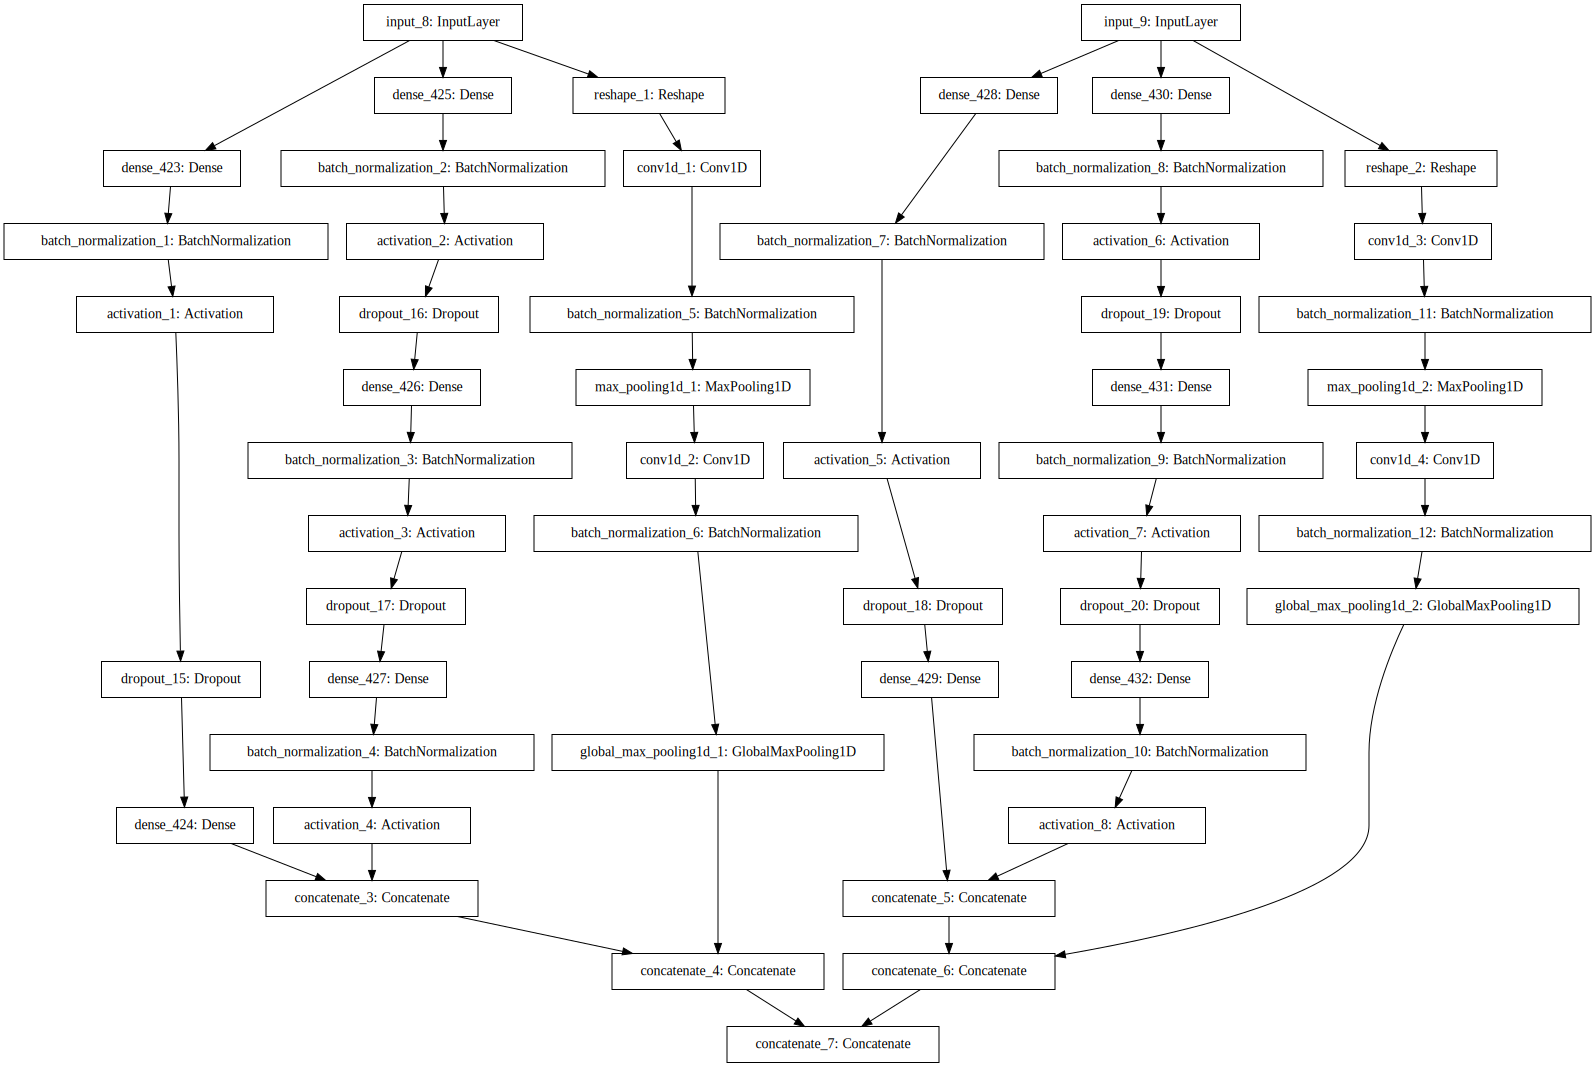

In [37]:
###### MG network####################################################
shared_layder_MG=create_model_shared(256)
shared_layder_AP=create_model_shared(512)
combined=concatenate([shared_layder_MG.output,shared_layder_AP.output])

Final_model = Model(inputs=[shared_layder_MG.input,shared_layder_AP.input], outputs=combined)
Final_model.summary()
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(Final_model).create(prog='dot', format='svg'))

In [ ]:
WaD_models_mtl = dict()
for x in filtered_tasks.keys():
    personal_layer = Dense(10, activation='relu')(Final_model.output)
    output_layer = Dense(1,activation='sigmoid')(personal_layer)
    model = Model(inputs=Final_model.input, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    WaD_models_mtl[x] = model

In [ ]:
tt=WaD_models_mtl['CHEMBL3375358']
SVG(model_to_dot(tt).create(prog='dot', format='svg'))

In [ ]:
%%time
EPOCHS = 10
from random import shuffle

all_keys = [key  for key,_ in filtered_tasks.items()]
print(len(all_keys))
for i in range(EPOCHS):
    print('Epoch',i,end=',')
    shuffle(all_keys)
    for x in all_keys:
        history=WaD_models_mtl[x].fit([X_train_MG[x],X_train_AP[x]],y_train[x],batch_size=16,verbose=0)
        print('training on',x, end=',')

In [ ]:
%%time
new_y_mtl=[]
new_yhat_mtl=[]

for x in X_test_MG.keys():
    yhat_mlp = WaD_models_mtl[x].predict([X_test_MG[x],X_test_AP[x]])

    new_y_mtl.append(y_test[x].ravel())
    new_yhat_mtl.append(yhat_mlp.ravel())

In [ ]:
np.save('WADnew_y_mtl.npy', new_y_mtl)
np.save('WADnew_yhat_mtl.npy', new_yhat_mtl)

In [2]:
WAD_y_mtl=np.load('WADnew_y_mtl.npy')
WAD_yhat_mtl=np.load('WADnew_yhat_mtl.npy')

In [57]:
new_final_y_gt=np.concatenate(WAD_y_mtl)
new_final_y_hat=np.concatenate(WAD_yhat_mtl)
new_final_y_hat=np.round(new_final_y_hat)

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print('Acc:',accuracy_score(new_final_y_hat,new_final_y_gt))
print('F1:',f1_score(new_final_y_hat,new_final_y_gt))

Acc: 0.6788793103448276
F1: 0.7395104895104894


0    0.622697
dtype: float64


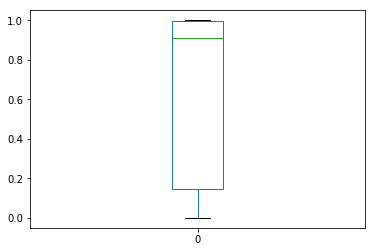

In [8]:
all_BEDROC=[]
for y_hat,y_gt in zip(WAD_yhat_mtl,WAD_y_mtl):
    Rdkit_score=sort_each_target(y_hat,y_gt)
    all_BEDROC.append(CalcBEDROC(Rdkit_score,1,20))
BEDROC=pd.DataFrame(all_BEDROC)
BEDROC.plot.box()
print(np.mean(BEDROC))

"Suppose there exist two explanations for an occurrence. In this case the one that requires the least speculation is usually better. "

¯\_(ツ)_/¯